In [ ]:
'''SET 1  E-Commerce Sales AnalysisScenario
An e-commerce company wants to analyze its sales performance across product categories over time.
Problem Statement
Create a dataset of at least 500 orders containing:



order_id, order_date, customer_id, product_category, price, quantity, discount_percent



Using Pandas:



Compute the final order amount after discount.



Calculate monthly revenue per product category.



Identify the top three categories by total revenue.



Using NumPy:



Detect unusually high or low order values.



Replace detected anomalies using a statistically valid method.



Using a visualization library:



Plot monthly revenue trends.



Compare revenue distribution across categories.
'''

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
np.random.seed(42)
n=500
data = {
    "order_id": np.arange(1, n + 1),
    "order_date": pd.date_range("2024-01-01", periods=n, freq="D"),
    "customer_id": np.random.randint(1000, 2000, n),
    "product_category": np.random.choice(
        ["Electronics", "Clothing", "Home", "Books", "Beauty"], n
    ),
    "price": np.random.uniform(100, 5000, n),
    "quantity": np.random.randint(1, 5, n),
    "discount_percent": np.random.choice([0, 5, 10, 15, 20], n)
}

df = pd.DataFrame(data)
df.head()

,order_id,order_date,customer_id,product_category,price,quantity,discount_percent
0,1,2024-01-01,1102,Home,1242.760417,1,15
1,2,2024-01-02,1435,Clothing,1780.341635,2,0
2,3,2024-01-03,1860,Clothing,2422.452713,4,0
3,4,2024-01-04,1270,Home,1840.011086,3,20
4,5,2024-01-05,1106,Clothing,3279.231917,4,15


In [26]:
df["final_amount"] = (
    df["price"] * df["quantity"] *
    (1 - df["discount_percent"] / 100)
)

df.head()

,order_id,order_date,customer_id,product_category,price,quantity,discount_percent,final_amount
0,1,2024-01-01,1102,Home,1242.760417,1,15,1056.346354
1,2,2024-01-02,1435,Clothing,1780.341635,2,0,3560.683270
2,3,2024-01-03,1860,Clothing,2422.452713,4,0,9689.810852
3,4,2024-01-04,1270,Home,1840.011086,3,20,4416.026607
4,5,2024-01-05,1106,Clothing,3279.231917,4,15,11149.388519


In [27]:
df["month"] = df["order_date"].dt.to_period("M")

monthly_revenue = (
    df.groupby(["month", "product_category"])["final_amount"]
      .sum()
      .reset_index()
)

monthly_revenue.head()

,month,product_category,final_amount
0,2024-01,Beauty,14358.365870
1,2024-01,Books,52152.976753
2,2024-01,Clothing,57907.691898
3,2024-01,Electronics,25347.717934
4,2024-01,Home,28050.002565


In [28]:
top_categories = (
    df.groupby("product_category")["final_amount"]
      .sum()
      .sort_values(ascending=False)
      .head(3)
)

top_categories

product_category
Beauty      675878.861925
Clothing    654781.951260
Books       580637.315608
Name: final_amount, dtype: float64

In [29]:
values = df["final_amount"].values

mean = np.mean(values)
std = np.std(values)

z_scores = (values - mean) / std
anomalies = np.abs(z_scores) > 3

np.sum(anomalies)

np.int64(0)

In [31]:
median_value = np.median(values)

df.loc[anomalies, "final_amount"] = median_value

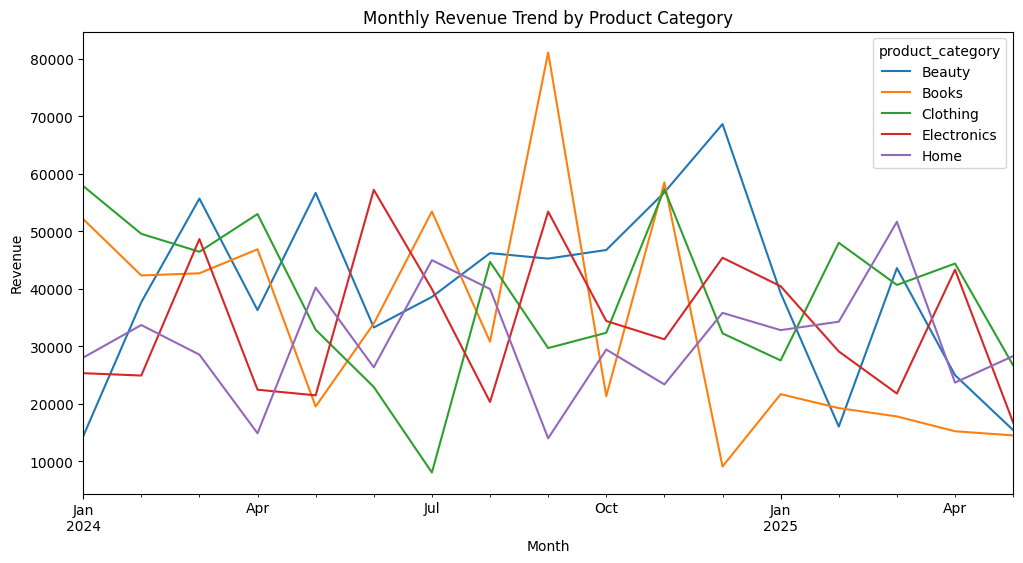

In [32]:
pivot_monthly = monthly_revenue.pivot(
    index="month",
    columns="product_category",
    values="final_amount"
)

pivot_monthly.plot(figsize=(12, 6))
plt.title("Monthly Revenue Trend by Product Category")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

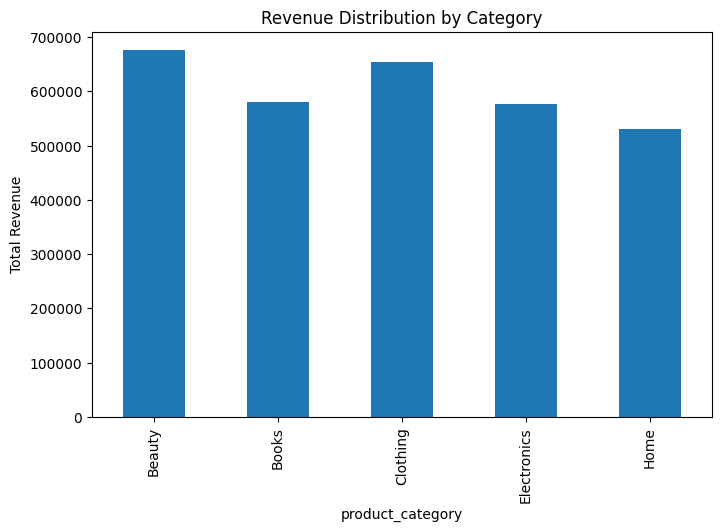

In [35]:
df.groupby("product_category")["final_amount"].sum().plot(
    kind="bar",
    figsize=(8, 5),
    title="Revenue Distribution by Category"
)
plt.ylabel("Total Revenue")
plt.show()